In [121]:
%matplotlib inline
import pandas as pd

In [122]:
happinessData = pd.read_csv("datasets/2017.csv")

In [123]:
happinessData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [124]:
happinessData.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [125]:
corr_matrix = happinessData.corr()

In [126]:
corr_matrix["Happiness.Score"].sort_values(ascending=False)

Happiness.Score                  1.000000
Whisker.low                      0.999520
Whisker.high                     0.999497
Economy..GDP.per.Capita.         0.812469
Health..Life.Expectancy.         0.781951
Family                           0.752737
Freedom                          0.570137
Dystopia.Residual                0.475355
Trust..Government.Corruption.    0.429080
Generosity                       0.155256
Happiness.Rank                  -0.992774
Name: Happiness.Score, dtype: float64

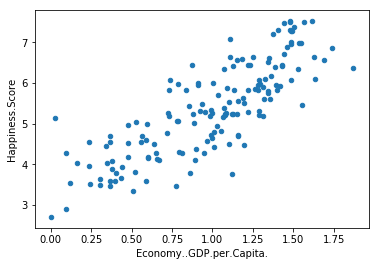

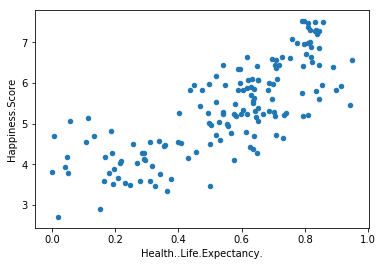

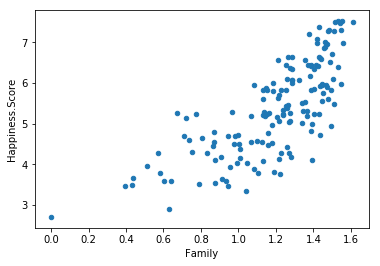

In [127]:
params = ("Economy..GDP.per.Capita.", "Health..Life.Expectancy.", "Family")

for param in params:
    happinessData.plot(kind="scatter", x=param, y="Happiness.Score")

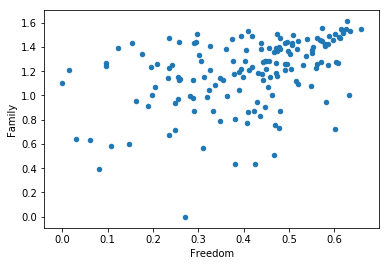

In [128]:
happinessData.plot(kind="scatter", x="Freedom", y="Family")

In [140]:
countriesData = pd.read_csv("datasets/countries.csv")

def removeTrailingWhitespacesFromCountryName(row):
    row["Country"] = row["Country"][:-1]
    
    for index, value in row.iteritems():
        if (index != "Country" and index != "Region" and not (type(row[index]) is int) and not (type(row[index]) is float)):
            row[index] = float(row[index].replace(",", "."))
    
    return row

countriesData = countriesData.apply(removeTrailingWhitespacesFromCountryName, axis=1)

In [141]:
mergedData = happinessData.merge(countriesData, how="left", on="Country")

In [143]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 154
Data columns (total 31 columns):
Country                               155 non-null object
Happiness.Rank                        155 non-null int64
Happiness.Score                       155 non-null float64
Whisker.high                          155 non-null float64
Whisker.low                           155 non-null float64
Economy..GDP.per.Capita.              155 non-null float64
Family                                155 non-null float64
Health..Life.Expectancy.              155 non-null float64
Freedom                               155 non-null float64
Generosity                            155 non-null float64
Trust..Government.Corruption.         155 non-null float64
Dystopia.Residual                     155 non-null float64
Region                                140 non-null object
Population                            140 non-null float64
Area (sq. mi.)                        140 non-null float64
Pop. Density (

In [144]:
mergedCorrMatrix = mergedData.corr()

In [147]:
mergedCorrMatrix["Happiness.Score"].sort_values(ascending=False)

Happiness.Score                       1.000000
Whisker.low                           0.999520
Whisker.high                          0.999497
Economy..GDP.per.Capita.              0.812469
Health..Life.Expectancy.              0.781951
Phones (per 1000)                     0.753217
Family                                0.752737
GDP ($ per capita)                    0.748551
Literacy (%)                          0.630777
Freedom                               0.570137
Service                               0.563860
Dystopia.Residual                     0.475355
Trust..Government.Corruption.         0.429080
Climate                               0.304160
Net migration                         0.225693
Coastline (coast/area ratio)          0.217192
Generosity                            0.155256
Area (sq. mi.)                        0.154824
Industry                              0.139179
Pop. Density (per sq. mi.)            0.104889
Other (%)                             0.055957
Arable (%)   

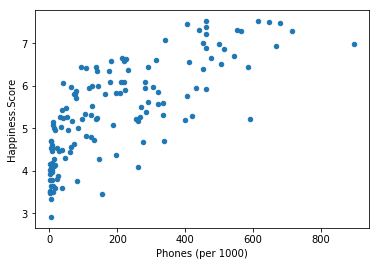

In [148]:
mergedData.plot(kind="scatter", x="Phones (per 1000)", y="Happiness.Score")